In [2]:
# Imports 
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from pandas.plotting import scatter_matrix 
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import TransformerMixin, BaseEstimator 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, accuracy_score

In [4]:
# Load dataset
stroke_dataset = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
stroke_dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Clean 'other' value from gender column
stroke_dataset = stroke_dataset[stroke_dataset.gender != 'Other']

In [4]:
# Explore dataset 
stroke_dataset.info()

"""
    Total entries => 5110 
    Data Columns => 12 
    Missing Values => bmi column 201 values 
    None numeric Values => gender, ever_married, work_type, residence_type, smoking_status
    Numeric Values => age, hypertension, heart_disease, avg_glucose_level, bmi
"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


'\n    Total entries => 5110 \n    Data Columns => 12 \n    Missing Values => bmi column 201 values \n    None numeric Values => gender, ever_married, work_type, residence_type, smoking_status\n    Numeric Values => age, hypertension, heart_disease, avg_glucose_level, bmi\n'

In [5]:
stroke_dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [6]:
# Check the labels for non numeric entries 
stroke_dataset.value_counts('gender')

gender
Female    2994
Male      2115
dtype: int64

In [7]:
stroke_dataset.value_counts('ever_married')

ever_married
Yes    3353
No     1756
dtype: int64

In [8]:
stroke_dataset.value_counts('work_type')

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
dtype: int64

In [9]:
stroke_dataset.value_counts('Residence_type')

Residence_type
Urban    2596
Rural    2513
dtype: int64

In [10]:
stroke_dataset.value_counts('smoking_status')

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
dtype: int64

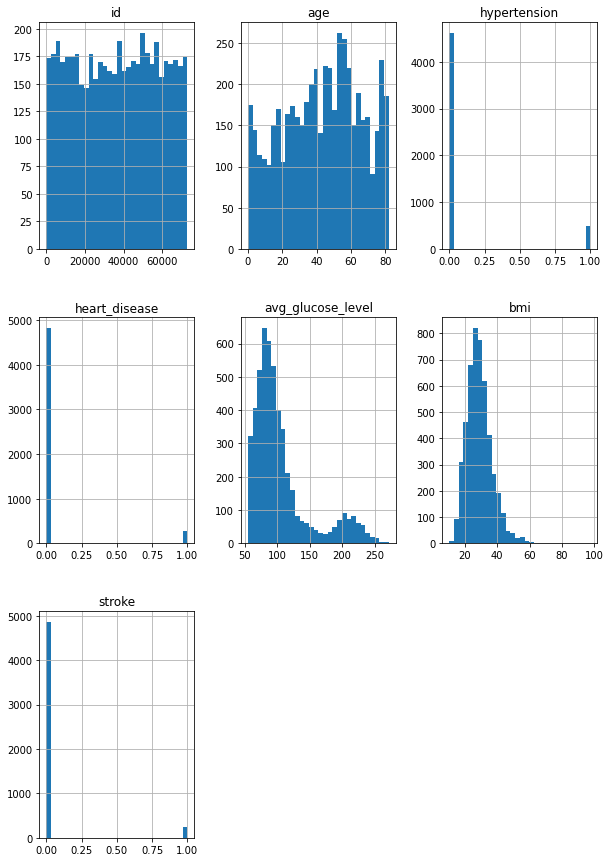

In [11]:
# Plot histogram
stroke_dataset.hist(bins=30, figsize=(10, 15))
plt.show()

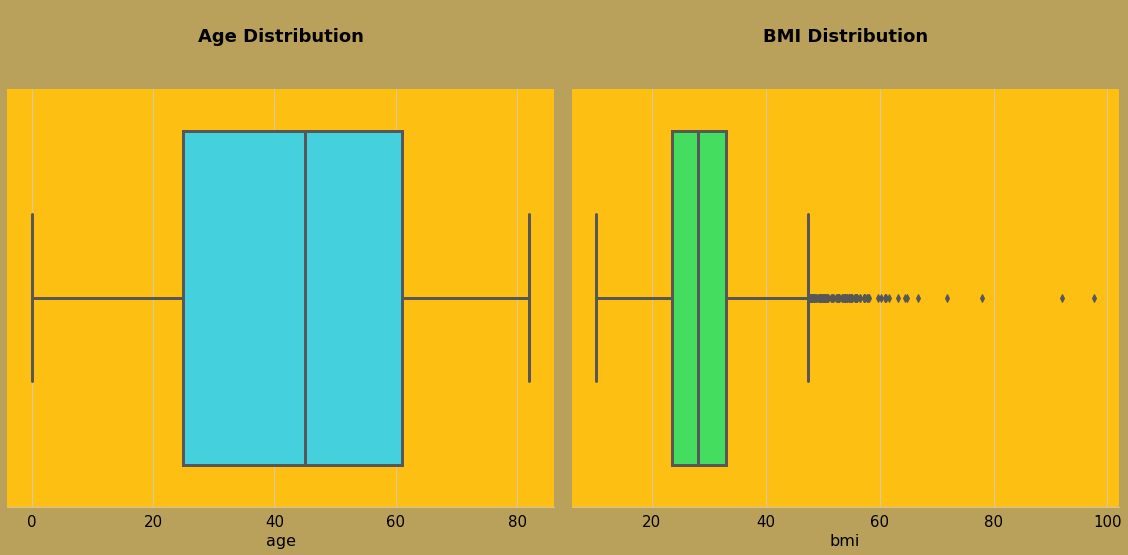

In [12]:
# Box plot for age and BMI
plt.rcParams['font.size'] = '16'
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16, 8])
fig.patch.set_facecolor('#baa15b')

ax[0].set_facecolor('#fcbf12')
ax[0].set_title("\nAge Distribution\n\n", fontweight='bold', fontsize=18, color='black')

ax[1].set_facecolor('#fcbf12')
ax[1].set_title("\nBMI Distribution\n\n", fontweight='bold', fontsize=18, color='black')

sns.boxplot(x=stroke_dataset['age'],ax=ax[0], color='#2ae6f7', zorder=3,linewidth=3)
sns.boxplot(x=stroke_dataset['bmi'],ax=ax[1],color='#2af750', zorder=3,linewidth=3)

for direction in ['top','right','left']:
    ax[0].spines[direction].set_visible(False)
    ax[1].spines[direction].set_visible(False)

ax[0].xaxis.label.set_color('black')
ax[0].yaxis.label.set_color('black')
ax[0].tick_params(axis='x', colors='black', labelsize=15)    
ax[0].tick_params(axis='y', colors='black', labelsize=15)

ax[1].xaxis.label.set_color('black')
ax[1].yaxis.label.set_color('black')
ax[1].tick_params(axis='x', colors='black', labelsize=15)    
ax[1].tick_params(axis='y', colors='black', labelsize=15)

plt.tight_layout()

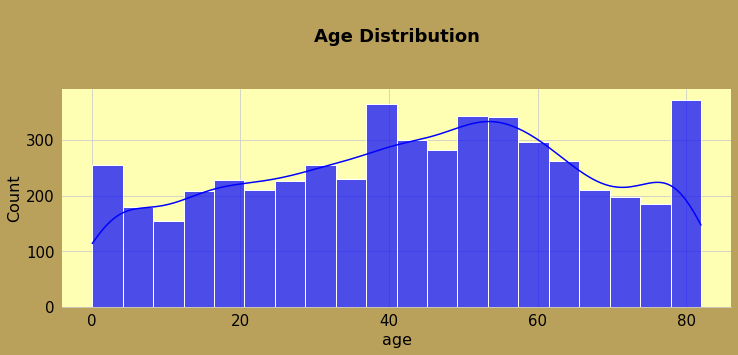

In [13]:
# Histogram plot for age distribution
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[12, 4])
fig.patch.set_facecolor('#baa15b')
ax.set_facecolor('#ffffb3')
ax.set_title("\nAge Distribution\n\n", fontweight='bold', fontsize=18, color='black')

sns.histplot(data=stroke_dataset, x='age', kde=True, ax=ax, alpha=0.7, color='blue')
for direction in ['top','right','left']:
    ax.spines[direction].set_visible(False)
    ax.spines[direction].set_visible(False)


ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black', labelsize=15)    
ax.tick_params(axis='y', colors='black', labelsize=15)

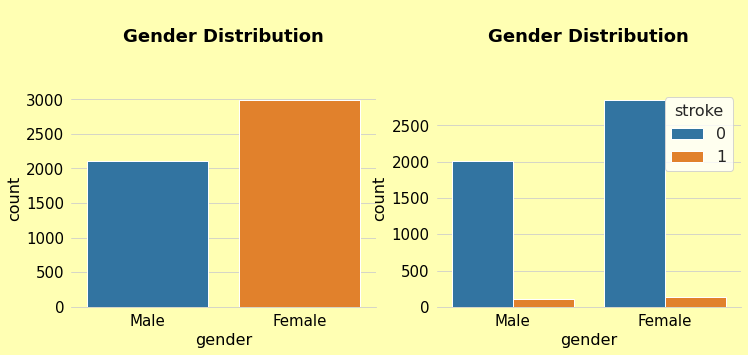

In [14]:
# Check the gender distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[12, 4])
fig.patch.set_facecolor('#ffffb3')
ax[0].set_facecolor('#ffffb3')
ax[0].set_title("\nGender Distribution\n\n", fontweight='bold', fontsize=18, color='black')

ax[1].set_facecolor('#ffffb3')
ax[1].set_title("\nGender Distribution\n\n", fontweight='bold', fontsize=18, color='black')

sns.countplot(data=stroke_dataset, x='gender', ax=ax[0])
sns.countplot(data=stroke_dataset, x='gender', hue='stroke', ax=ax[1])

for direction in ['top','right','left']:
    ax[0].spines[direction].set_visible(False)
    ax[0].spines[direction].set_visible(False)
    ax[1].spines[direction].set_visible(False)
    ax[1].spines[direction].set_visible(False)


ax[0].xaxis.label.set_color('black')
ax[0].yaxis.label.set_color('black')
ax[0].tick_params(axis='x', colors='black', labelsize=15)    
ax[0].tick_params(axis='y', colors='black', labelsize=15)
ax[1].xaxis.label.set_color('black')
ax[1].yaxis.label.set_color('black')
ax[1].tick_params(axis='x', colors='black', labelsize=15)    
ax[1].tick_params(axis='y', colors='black', labelsize=15)

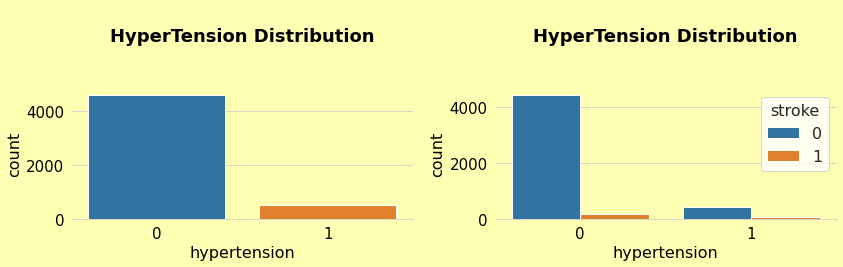

In [15]:
# Hypertension distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[12, 4])
fig.patch.set_facecolor('#ffffb3')
ax[0].set_facecolor('#ffffb3')
ax[0].set_title("\nHyperTension Distribution\n\n", fontweight='bold', fontsize=18, color='black')

ax[1].set_facecolor('#ffffb3')
ax[1].set_title("\nHyperTension Distribution\n\n", fontweight='bold', fontsize=18, color='black')

sns.countplot(data=stroke_dataset, x='hypertension', ax=ax[0])
sns.countplot(data=stroke_dataset, x='hypertension', hue='stroke', ax=ax[1])

for direction in ['top','right','left']:
    ax[0].spines[direction].set_visible(False)
    ax[0].spines[direction].set_visible(False)
    ax[1].spines[direction].set_visible(False)
    ax[1].spines[direction].set_visible(False)

ax[0].xaxis.label.set_color('black')
ax[0].yaxis.label.set_color('black')
ax[0].tick_params(axis='x', colors='black', labelsize=15)    
ax[0].tick_params(axis='y', colors='black', labelsize=15)
ax[1].xaxis.label.set_color('black')
ax[1].yaxis.label.set_color('black')
ax[1].tick_params(axis='x', colors='black', labelsize=15)    
ax[1].tick_params(axis='y', colors='black', labelsize=15)

plt.tight_layout()

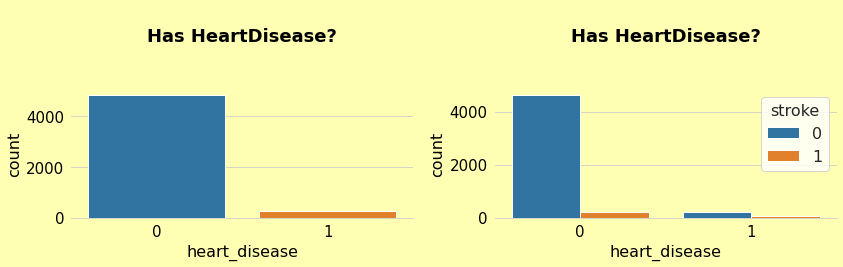

In [16]:
# Heart Disease Distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[12, 4])
fig.patch.set_facecolor('#ffffb3')
ax[0].set_facecolor('#ffffb3')
ax[0].set_title("\nHas HeartDisease?\n\n", fontweight='bold', fontsize=18, color='black')

ax[1].set_facecolor('#ffffb3')
ax[1].set_title("\nHas HeartDisease?\n\n", fontweight='bold', fontsize=18, color='black')

sns.countplot(data=stroke_dataset, x='heart_disease', ax=ax[0])
sns.countplot(data=stroke_dataset, x='heart_disease', hue='stroke', ax=ax[1])

for direction in ['top','right','left']:
    ax[0].spines[direction].set_visible(False)
    ax[0].spines[direction].set_visible(False)
    ax[1].spines[direction].set_visible(False)
    ax[1].spines[direction].set_visible(False)


ax[0].xaxis.label.set_color('black')
ax[0].yaxis.label.set_color('black')
ax[0].tick_params(axis='x', colors='black', labelsize=15)    
ax[0].tick_params(axis='y', colors='black', labelsize=15)
ax[1].xaxis.label.set_color('black')
ax[1].yaxis.label.set_color('black')
ax[1].tick_params(axis='x', colors='black', labelsize=15)    
ax[1].tick_params(axis='y', colors='black', labelsize=15)

plt.tight_layout()

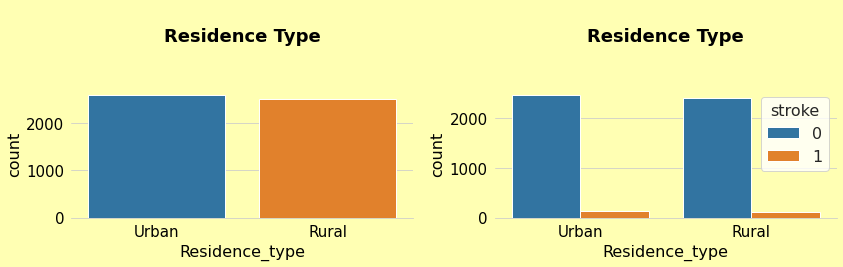

In [17]:
# Residance histogram plot rural and urban population
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[12, 4])
fig.patch.set_facecolor('#ffffb3')
ax[0].set_facecolor('#ffffb3')
ax[0].set_title("\nResidence Type\n\n", fontweight='bold', fontsize=18, color='black')

ax[1].set_facecolor('#ffffb3')
ax[1].set_title("\nResidence Type\n\n", fontweight='bold', fontsize=18, color='black')

sns.countplot(data=stroke_dataset, x='Residence_type', ax=ax[0])
sns.countplot(data=stroke_dataset, x='Residence_type', hue='stroke', ax=ax[1])

for direction in ['top','right','left']:
    ax[0].spines[direction].set_visible(False)
    ax[1].spines[direction].set_visible(False)

ax[0].xaxis.label.set_color('black')
ax[0].yaxis.label.set_color('black')
ax[0].tick_params(axis='x', colors='black', labelsize=15)    
ax[0].tick_params(axis='y', colors='black', labelsize=15)
ax[1].xaxis.label.set_color('black')
ax[1].yaxis.label.set_color('black')
ax[1].tick_params(axis='x', colors='black', labelsize=15)    
ax[1].tick_params(axis='y', colors='black', labelsize=15)

plt.tight_layout()

In [18]:
# Check out features correlation 
corr = stroke_dataset.corr()
corr['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.245239
heart_disease        0.134905
avg_glucose_level    0.131991
hypertension         0.127891
bmi                  0.042341
id                   0.006430
Name: stroke, dtype: float64

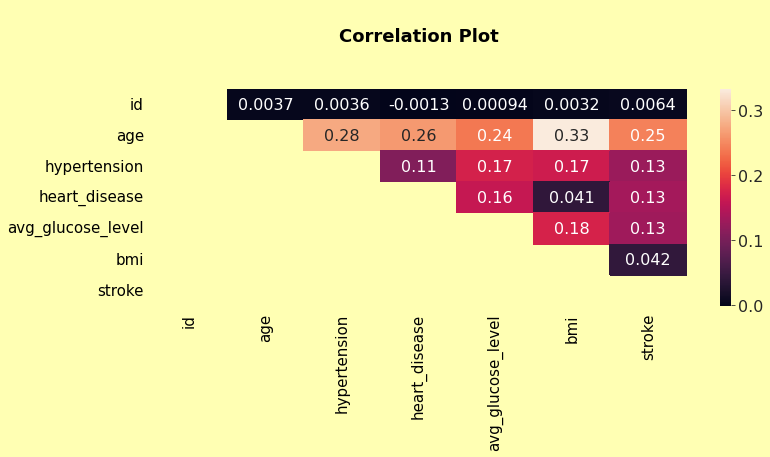

In [19]:
# Correlation plot for stroke 
mask = np.zeros_like(stroke_dataset.corr())
tri_ind = np.tril_indices_from(mask)
mask[tri_ind] = True

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[12, 4])
fig.patch.set_facecolor('#ffffb3')
ax.set_facecolor('#ffffb3')
ax.set_title("\nCorrelation Plot\n\n", fontweight='bold', fontsize=18, color='black')

sns.heatmap(data=stroke_dataset.corr(), annot=True, mask=mask, ax=ax)

for direction in ['top','right','left']:
    ax.spines[direction].set_visible(False)
    ax.spines[direction].set_visible(False)


ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black', labelsize=15)    
ax.tick_params(axis='y', colors='black', labelsize=15)

In [20]:
stroke_dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Get X and Y values 
X = stroke_dataset.iloc[:, :-1]
y = stroke_dataset.iloc[:, -1]

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
pd.DataFrame(y_train).value_counts()

stroke
0         3900
1          187
dtype: int64

In [7]:
# Remove the ID column
for set_ in (X_train, X_test):
    set_.drop("id", axis=1, inplace=True)

In [25]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4687,Male,31.0,0,0,No,Self-employed,Rural,64.85,23.0,Unknown
4477,Male,40.0,0,0,Yes,Self-employed,Rural,65.29,28.3,never smoked
3520,Male,52.0,0,0,Yes,Private,Rural,111.04,30.0,never smoked
4354,Female,79.0,1,0,Yes,Self-employed,Rural,76.64,19.5,never smoked
3825,Female,75.0,0,0,Yes,Govt_job,Rural,94.77,27.2,never smoked


In [8]:
# Create custom transformer to add attributes 
age_index, avg_glucose_index, bmi_index = 0, 3, 4

class CombinedAttributeAdder(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self 
    def transform(self, X, y=None):
        age_per_bmi = X[:, age_index] / X[:, bmi_index]
        age_per_avg_glucose= X[:, age_index] / X[:, avg_glucose_index]
        return np.c_[X, age_per_bmi, age_per_avg_glucose]

In [9]:
# Preprocess data 
x_numeric_attributes = X_train.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1)
numeric_attributes = list(x_numeric_attributes)
categorical_attributes = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [10]:
# Create Pipelines and transform data 
num_pipeline = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='median')),
        ('attribute_adder', CombinedAttributeAdder()),
        ('std_scaler', StandardScaler())
    ]
)

full_pipeline = ColumnTransformer(
    [
        ('num', num_pipeline, numeric_attributes),
        ('cat', OneHotEncoder(), categorical_attributes)
    ]
)

X_train_processed = full_pipeline.fit_transform(X_train)

In [29]:
pd.DataFrame(X_train_processed)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.588594,-0.320170,-0.230389,0.142703,-0.048416,1.527002,0.897607,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.836881,-0.320170,-0.230389,-0.392719,0.957663,0.251022,0.899901,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-0.976075,-0.320170,-0.230389,-1.026771,0.622304,-1.050026,-0.345038,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.533891,-0.320170,-0.230389,-0.890714,0.196655,-0.574396,0.079315,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.533891,-0.320170,-0.230389,-1.024350,-1.157682,0.070888,0.250566,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,0.792662,-0.320170,-0.230389,0.836198,0.119264,0.657573,-0.094114,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4083,0.792662,3.123342,-0.230389,1.406625,4.040392,-0.582129,-0.324018,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4084,-1.853369,-0.320170,-0.230389,-0.195458,-1.428550,-1.719206,-1.560483,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4085,-0.224362,-0.320170,-0.230389,-0.269211,-0.951307,0.322324,-0.160584,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [11]:
# Transform testing data
X_test = full_pipeline.transform(X_test)

In [31]:
# Save transformer pipeline 
dump(full_pipeline, './transformer_pipeline.joblib')

['./transformer_pipeline.joblib']

In [13]:
# Use SMOTE to solve the class imbalance problem 
smote = SMOTE()
x_resample, y_resample = smote.fit_resample(X_train_processed, y_train.ravel())

In [33]:
# Check the number of training labels 
pd.DataFrame(y_resample).value_counts()

0    3900
1    3900
dtype: int64

In [34]:
# Train K-nearest Neighbors classifier 
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(x_resample, y_resample)
random_data = X_train_processed[:3]
random_data_label = y_train[:3]
predictions = kn_classifier.predict(random_data)
print(predictions)
print(random_data_label)

[1 0 0]
802     0
3926    0
2337    0
Name: stroke, dtype: int64


In [35]:
# Use Cross_val_score to determine the accuracy of logistic Regression
cross_val_score(kn_classifier, X_train_processed, y_train, scoring='accuracy', cv=5)

array([0.95232274, 0.95354523, 0.95226438, 0.95104039, 0.95226438])

In [36]:
# Check out the confusion matrix 
y_train_predictions = cross_val_predict(kn_classifier, x_resample, y_resample, cv=5)
confusion_matrix(y_resample, y_train_predictions)

array([[3189,  711],
       [  17, 3883]])

In [37]:
# Calculate the precision and recall score, f1_score 
precision = precision_score(y_resample, y_train_predictions)
recall = recall_score(y_resample, y_train_predictions)
f1 = f1_score(y_resample, y_train_predictions)
print('Precision ', precision)
print('Recall ', recall)
print('F1 ', f1)

Precision  0.8452329124945581
Recall  0.9956410256410256
F1  0.9142924417235696


In [38]:
# Roc_auc_score 
roc_auc_score(y_resample, y_train_predictions)

0.9066666666666667

In [39]:
# Use Grid Search to get best parameter combinations
knb_clf = KNeighborsClassifier()

param_grids = [
    {'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5]}
]

grid_search = GridSearchCV(
    knb_clf, param_grid=param_grids, scoring='accuracy', cv=5, verbose=3
)

grid_search.fit(x_resample, y_resample)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.934 total time=   0.2s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.921 total time=   0.2s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.928 total time=   0.2s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.926 total time=   0.2s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.926 total time=   0.2s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.937 total time=   0.2s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.925 total time=   0.2s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.931 total time=   0.2s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.930 total time=   0.2s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.929 total time=   0.2s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.938 total time=   0.3s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy', verbose=3)

In [40]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [41]:
# Train K-nearest Neighbors classifier 
kn_classifier = grid_search.best_estimator_ 
kn_classifier.fit(x_resample, y_resample)
# Check out the confusion matrix 
y_train_predictions = cross_val_predict(kn_classifier, x_resample, y_resample, cv=5)
confusion_matrix(y_resample, y_train_predictions)

array([[3370,  530],
       [  11, 3889]])

In [42]:
# Calculate the precision and recall score, f1_score 
precision = precision_score(y_resample, y_train_predictions)
recall = recall_score(y_resample, y_train_predictions)
f1 = f1_score(y_resample, y_train_predictions)
print('Precision ', precision)
print('Recall ', recall)
print('F1 ', f1)

Precision  0.8800633627517538
Recall  0.9971794871794872
F1  0.9349681452097608


In [43]:
# Roc_auc_score 
roc_auc_score(y_resample, y_train_predictions)

0.9306410256410258

In [44]:
# Train Logistic Regression Model
log_regression = LogisticRegression()
log_regression.fit(x_resample, y_resample)

random_data = x_resample[:3]
random_data_label = y_resample[:3]
predictions = log_regression.predict(random_data)
print(predictions)
print(random_data_label)

[1 1 0]
[0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [45]:
# Use Cross_val_score to determine the accuracy of logistic Regression
cross_val_score(log_regression, x_resample, y_resample, scoring='accuracy', cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.77307692, 0.78461538, 0.77628205, 0.79230769, 0.80512821])

In [46]:
# Check out the confusion matrix 
y_train_predictions = cross_val_predict(log_regression, x_resample, y_resample, cv=5)
confusion_matrix(y_resample, y_train_predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([[2929,  971],
       [ 696, 3204]])

In [47]:
# Calculate the precision and recall score, f1_score 
precision = precision_score(y_resample, y_train_predictions)
recall = recall_score(y_resample, y_train_predictions)
f1 = f1_score(y_resample, y_train_predictions)
roc_auc = roc_auc_score(y_resample, y_train_predictions)
print('Precision ', precision)
print('Recall ', recall)
print('F1 ', f1)
print('ROC_AUC ', roc_auc)

Precision  0.7674251497005988
Recall  0.8215384615384616
F1  0.793560371517028
ROC_AUC  0.7862820512820513


In [48]:
# Function to plot the precision recall curve
def plot_precision_recall_vs_threshold(precision, recall, thresholds):
    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recall[:-1], "g-", label='Recall')
    plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


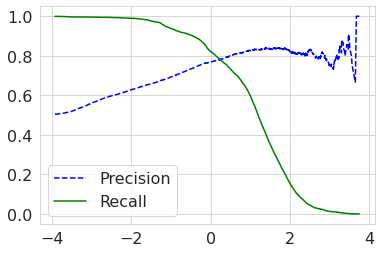

In [49]:
# Get predicion scores 
y_scores = cross_val_predict(log_regression, x_resample, y_resample, cv=5, method='decision_function')
precision, recall, thresholds = precision_recall_curve(y_resample, y_scores)

plot_precision_recall_vs_threshold(precision, recall, thresholds)
plt.show()

No handles with labels found to put in legend.


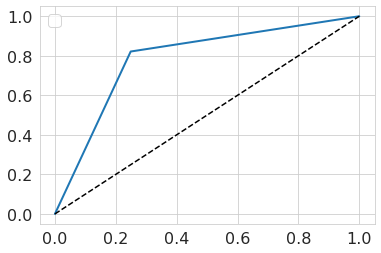

In [50]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_resample, y_train_predictions)

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend()

plot_roc_curve(fpr, tpr)
plt.show()

In [51]:
# Train RandomForest Classifier 
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_resample, y_resample)
random_data = x_resample[:3]
random_data_label = y_resample[:3]
predictions = rf_classifier.predict(random_data)
print(predictions)
print(random_data_label)

[0 0 0]
[0 0 0]


In [52]:
# Use Cross_val_score to determine the accuracy of logistic Regression
cross_val_score(rf_classifier, x_resample, y_resample, scoring='accuracy', cv=5)

array([0.93076923, 0.97820513, 0.98397436, 0.975     , 0.97884615])

In [53]:
# Check out the confusion matrix 
y_train_predictions = cross_val_predict(rf_classifier, x_resample, y_resample, cv=5)
confusion_matrix(y_resample, y_train_predictions)

array([[3776,  124],
       [ 115, 3785]])

In [54]:
# Calculate the precision and recall score, f1_score 
precision = precision_score(y_resample, y_train_predictions)
recall = recall_score(y_resample, y_train_predictions)
f1 = f1_score(y_resample, y_train_predictions)
roc_auc = roc_auc_score(y_resample, y_train_predictions)
print('Precision ', precision)
print('Recall ', recall)
print('F1 ', f1)
print('ROC_AUC ', roc_auc)

Precision  0.9682783320542339
Recall  0.9705128205128205
F1  0.9693942886413114
ROC_AUC  0.9693589743589743


In [55]:
# Use Grid Search For hyperparameter tuning 
rf_classifier = RandomForestClassifier()

param_grids = [
    {'n_estimators': [100, 200, 300], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2']}
] 

grid_search = GridSearchCV(rf_classifier, param_grid=param_grids, scoring='accuracy', cv=5, verbose=3)
grid_search.fit(x_resample, y_resample)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.930 total time=   0.9s
[CV 2/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.980 total time=   0.9s
[CV 3/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.980 total time=   0.9s
[CV 4/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.974 total time=   0.9s
[CV 5/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.979 total time=   0.9s
[CV 1/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.928 total time=   1.8s
[CV 2/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.980 total time=   1.8s
[CV 3/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.981 total time=   1.8s
[CV 4/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.974 total time=   1.8s
[CV 5/5] END criterion=gini, max_features=auto, n_estimat

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 200, 300]}],
             scoring='accuracy', verbose=3)

In [56]:
grid_search.best_estimator_

RandomForestClassifier(max_features='log2')

In [57]:
# Train K-nearest Neighbors classifier 
rf_classifier = grid_search.best_estimator_ 
rf_classifier.fit(x_resample, y_resample)
# Check out the confusion matrix 
y_train_predictions = cross_val_predict(rf_classifier, x_resample, y_resample, cv=5)
conf_mat = confusion_matrix(y_resample, y_train_predictions)
# Calculate the precision and recall score, f1_score 
precision = precision_score(y_resample, y_train_predictions)
recall = recall_score(y_resample, y_train_predictions)
f1 = f1_score(y_resample, y_train_predictions)
roc_auc = roc_auc_score(y_resample, y_train_predictions)
print('Precision ', precision)
print('Recall ', recall)
print('F1 ', f1)
print('ROC_AUC ', roc_auc)
print(conf_mat)

Precision  0.9680306905370843
Recall  0.9705128205128205
F1  0.969270166453265
ROC_AUC  0.9692307692307693
[[3775  125]
 [ 115 3785]]


In [58]:
# Train Multilayer perceptron classifier 
mlp_classifier = MLPClassifier()
mlp_classifier.fit(x_resample, y_resample)

random_data = x_resample[:3]
random_label = y_resample[:3]
predictions = mlp_classifier.predict(random_data)
print(predictions)
print(random_label)

[1 0 0]
[0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [59]:
# Use Cross_val_score to determine the accuracy of logistic Regression
cross_val_score(mlp_classifier, x_resample, y_resample, scoring='accuracy', cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

array([0.94487179, 0.9474359 , 0.94230769, 0.94102564, 0.95512821])

In [60]:
# Check out the confusion matrix 
y_train_predictions = cross_val_predict(mlp_classifier, x_resample, y_resample, cv=5)
confusion_matrix(y_resample, y_train_predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

array([[3578,  322],
       [  44, 3856]])

In [61]:
# Calculate the precision and recall score, f1_score 
precision = precision_score(y_resample, y_train_predictions)
recall = recall_score(y_resample, y_train_predictions)
f1 = f1_score(y_resample, y_train_predictions)
roc_score = roc_auc_score(y_resample, y_train_predictions)
print('Precision ', precision)
print('Recall ', recall)
print('F1 ', f1)
print('AUC_ROC ', roc_score)

Precision  0.922929631402585
Recall  0.9887179487179487
F1  0.9546917553849963
AUC_ROC  0.953076923076923


In [ ]:
# Use Grid Search to get best parameter combinations
mlp_classifier = MLPClassifier()

param_grids = [
    {
        'hidden_layer_sizes': [100, 200, 300], 'activation': ['identity', 'tanh', 'relu'],
        'solver': ['sgd', 'adam'], 'learning_rate': ['constant', 'invscaling', 'adaptive'],
        'max_iter': [200, 400, 600]
    }
]

grid_search = GridSearchCV(
    mlp_classifier, param_grid=param_grids, scoring='accuracy', cv=5, verbose=2
)

grid_search.fit(x_resample, y_resample)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END activation=identity, hidden_layer_sizes=100, learning_rate=constant, max_iter=200, solver=sgd; total time=   2.4s
[CV] END activation=identity, hidden_layer_sizes=100, learning_rate=constant, max_iter=200, solver=sgd; total time=   4.2s
[CV] END activation=identity, hidden_layer_sizes=100, learning_rate=constant, max_iter=200, solver=sgd; total time=   3.2s
[CV] END activation=identity, hidden_layer_sizes=100, learning_rate=constant, max_iter=200, solver=sgd; total time=   3.0s
[CV] END activation=identity, hidden_layer_sizes=100, learning_rate=constant, max_iter=200, solver=sgd; total time=   3.5s
[CV] END activation=identity, hidden_layer_sizes=100, learning_rate=constant, max_iter=200, solver=adam; total time=   2.3s
[CV] END activation=identity, hidden_layer_sizes=100, learning_rate=constant, max_iter=200, solver=adam; total time=   1.7s
[CV] END activation=identity, hidden_layer_sizes=100, learning_rate=consta

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=adaptive, max_iter=200, solver=sgd; total time=   8.8s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=adaptive, max_iter=200, solver=sgd; total time=   7.1s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=adaptive, max_iter=200, solver=sgd; total time=   7.2s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=adaptive, max_iter=200, solver=sgd; total time=   6.6s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=adaptive, max_iter=200, solver=adam; total time=   2.3s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=adaptive, max_iter=200, solver=adam; total time=   1.9s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=adaptive, max_iter=200, solver=adam; total time=   2.2s
[CV] END activation=identity, hidden_layer_sizes=200, learning_rate=adaptive, max_iter=200, solver=adam; total time=   2.7s
[CV] END act

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=200, solver=sgd; total time=  12.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=200, solver=sgd; total time=  12.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=200, solver=sgd; total time=  12.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=200, solver=sgd; total time=  12.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=200, solver=sgd; total time=  12.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=200, solver=adam; total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=200, solver=adam; total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=200, solver=adam; total time=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=200, solver=adam; total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=200, solver=adam; total time=  13.7s
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=400, solver=sgd; total time=  20.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=400, solver=sgd; total time=  24.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=400, solver=sgd; total time=  24.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=400, solver=sgd; total time=  24.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=400, solver=sgd; total time=  24.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=400, solver=adam; total time=  27.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=400, solver=adam; total time=  27.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=400, solver=adam; total time=  27.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=400, solver=adam; total time=  27.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=400, solver=adam; total time=  27.0s
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=600, solver=sgd; total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=600, solver=sgd; total time=  37.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=600, solver=sgd; total time=  37.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=600, solver=sgd; total time=  37.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=600, solver=sgd; total time=  37.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=600, solver=adam; total time=  41.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=600, solver=adam; total time=  41.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=600, solver=adam; total time=  41.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=600, solver=adam; total time=  41.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=constant, max_iter=600, solver=adam; total time=  41.2s
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=200, solver=sgd; total time=   2.6s
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=200, solver=sgd; total time=   2.6s
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=200, solver=sgd; total time=   2.0s
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=200, solver=sgd; total time=   2.6s
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=200, solver=sgd; total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=200, solver=adam; total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=200, solver=adam; total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=200, solver=adam; total time=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=200, solver=adam; total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=200, solver=adam; total time=  13.4s
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=400, solver=sgd; total time=   3.4s
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=400, solver=sgd; total time=   6.3s
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=400, solver=sgd; total time=   2.3s
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=400, solver=sgd; total time=   2.8s
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=400, solver=sgd; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=400, solver=adam; total time=  27.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=400, solver=adam; total time=  27.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=400, solver=adam; total time=  27.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=400, solver=adam; total time=  27.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=400, solver=adam; total time=  27.4s
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=600, solver=sgd; total time=   4.7s
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=600, solver=sgd; total time=   2.8s
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=600, solver=sgd; total time=   4.0s
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=600, solver=sgd; total time=   3.7s
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=600, solver=sgd; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=600, solver=adam; total time=  41.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=600, solver=adam; total time=  41.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=600, solver=adam; total time=  41.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=600, solver=adam; total time=  40.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=600, solver=adam; total time=  41.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=200, solver=sgd; total time=  12.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=200, solver=sgd; total time=  12.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=200, solver=sgd; total time=  12.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=200, solver=sgd; total time=  12.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=200, solver=sgd; total time=  12.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=200, solver=adam; total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=200, solver=adam; total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=200, solver=adam; total time=  13.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=200, solver=adam; total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=200, solver=adam; total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=400, solver=sgd; total time=  24.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=400, solver=sgd; total time=  25.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=400, solver=sgd; total time=  24.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=400, solver=sgd; total time=  24.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=400, solver=sgd; total time=  24.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=400, solver=adam; total time=  27.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=400, solver=adam; total time=  27.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=400, solver=adam; total time=  27.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=400, solver=adam; total time=  27.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=400, solver=adam; total time=  27.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=600, solver=sgd; total time=  37.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=600, solver=sgd; total time=  37.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=600, solver=sgd; total time=  37.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=600, solver=sgd; total time=  37.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=600, solver=sgd; total time=  37.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=600, solver=adam; total time=  41.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=600, solver=adam; total time=  40.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=600, solver=adam; total time=  40.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=600, solver=adam; total time=  41.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate=adaptive, max_iter=600, solver=adam; total time=  40.9s
[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=constant, max_iter=200, solver=sgd; total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=constant, max_iter=200, solver=sgd; total time=  21.5s
[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=constant, max_iter=200, solver=sgd; total time=  16.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=constant, max_iter=200, solver=sgd; total time=  21.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=constant, max_iter=200, solver=sgd; total time=  21.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=constant, max_iter=200, solver=adam; total time=  23.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=constant, max_iter=200, solver=adam; total time=  23.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=constant, max_iter=200, solver=adam; total time=  23.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=constant, max_iter=200, solver=adam; total time=  23.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=constant, max_iter=200, solver=adam; total time=  23.5s
[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=constant, max_iter=400, solver=sgd; total time=  17.4s
[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=constant, max_iter=400, solver=sgd; total time=  37.6s
[CV] END activation=tanh, hidden_layer_sizes=200, learning_rate=constant, max_iter=400, solver=sgd; total time=  24.0s


In [ ]:
grid_search.best_estimator_

In [14]:
# Train K-nearest Neighbors classifier 
# mlp_classifier = grid_search.best_estimator_
mlp_classifier = MLPClassifier(hidden_layer_sizes=300, learning_rate='invscaling', max_iter=600)
mlp_classifier.fit(x_resample, y_resample)
# Check out the confusion matrix 
y_train_predictions = cross_val_predict(mlp_classifier, x_resample, y_resample, cv=5)
conf_mat = confusion_matrix(y_resample, y_train_predictions)
# Calculate the precision and recall score, f1_score 
precision = precision_score(y_resample, y_train_predictions)
recall = recall_score(y_resample, y_train_predictions)
f1 = f1_score(y_resample, y_train_predictions)
roc_auc = roc_auc_score(y_resample, y_train_predictions)
print('Precision ', precision)
print('Recall ', recall)
print('F1 ', f1)
print('ROC_AUC ', roc_auc)
print(conf_mat)

Precision  0.9500611995104039
Recall  0.9951282051282051
F1  0.9720726361928617
ROC_AUC  0.9714102564102565
[[3696  204]
 [  19 3881]]


In [15]:
# Function to train final models
def train_final_models(X_train, y_train):
    accuracy = []
    f1 = []
    models = []
    models.append(KNeighborsClassifier(n_neighbors=4, weights='distance'))
    models.append(LogisticRegression())
    models.append(RandomForestClassifier(criterion= 'entropy', max_features= 'log2', n_estimators=300))
    models.append(MLPClassifier(hidden_layer_sizes=300, learning_rate='invscaling', max_iter=600))
    
    for model in models:
        model_i = model 
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        accuracy.append((round(accuracy_score(y_test, prediction), 2)) * 100)
        f1.append((round(f1_score(y_test, prediction), 2)) * 100)
        
        print(f'Model: {model}')
        print(f'Accuracy: {accuracy_score(y_test, prediction)}')
        print(f'F1 Score: {f1_score(y_test, prediction)}')
        print('\n')
        

In [16]:
train_final_models(x_resample, y_resample)

Model: KNeighborsClassifier(n_neighbors=4, weights='distance')
Accuracy: 0.8414872798434442
F1 Score: 0.18181818181818182


Model: LogisticRegression()
Accuracy: 0.7426614481409002
F1 Score: 0.27548209366391185




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Model: RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=300)
Accuracy: 0.9197651663405088
F1 Score: 0.06818181818181818


Model: MLPClassifier(hidden_layer_sizes=300, learning_rate='invscaling', max_iter=600)
Accuracy: 0.9050880626223092
F1 Score: 0.11009174311926605




In [17]:
# Train the final model and test it, not fine-tuned
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_resample, y_resample)
prediction = rf_classifier.predict(X_test)
accuracy = (round(accuracy_score(y_test, prediction), 2)) * 100 
f1score = (round(f1_score(y_test, prediction), 2)) * 100
print('Accuracy ', accuracy)
print('F1-Score ', f1score)

Accuracy  92.0
F1-Score  7.000000000000001


In [18]:
# Train the final model and test it, fine-tuned
rf_classifier = RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=300, random_state=42)
rf_classifier.fit(x_resample, y_resample)
prediction = rf_classifier.predict(X_test)
accuracy = (round(accuracy_score(y_test, prediction), 2)) * 100 
f1score = (round(f1_score(y_test, prediction), 2)) * 100
print('Accuracy ', accuracy)
print('F1-Score ', f1score)

Accuracy  92.0
F1-Score  7.000000000000001


In [19]:
# Compile and save the final model
dump(rf_classifier, './final_classifier.joblib')

['./final_classifier.joblib']